*Author: leo.lopes*

# Additional EDA

This notebook aims to perform some EDA, in addition to the given ones in EDA.ipynb

## Load every important files

*Applying `eval` to each entry in the corresponding column, converting string representations of Python literals into their actual Python objects.*

In [26]:
from load_clean import load_and_clean_data

big_matrix, small_matrix, social_network, item_categories, user_features, item_daily_features = load_and_clean_data()

Loading big and small matrices...
Loading social network...
Loading item features...
Loading user features...
Loading items' daily features...
All data loaded.
Cleaning data...
Data cleaned.
Big matrix: 7.71% cleaned
Small matrix: 3.89% cleaned
Social network: 0.00% cleaned
Item categories: 0.00% cleaned
User features: 3.86% cleaned
Item daily features: 30.11% cleaned


## Visualize the raw data

In [25]:
small_matrix
# social_network
# item_categories
# user_features
# item_daily_features

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364
...,...,...,...,...,...,...,...,...
4676565,7162,2267,11908,5467,NaN,NaN,NaN,2.178160
4676566,7162,2065,11919,6067,NaN,NaN,NaN,1.964562
4676567,7162,1296,16690,19870,NaN,NaN,NaN,0.839960
4676568,7162,4822,11862,24400,NaN,NaN,NaN,0.486148


## Advanced Data Visualisation

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from matplotlib.font_manager import FontProperties
from scipy.stats import norm, skew
myfont = FontProperties(fname="./SimHei.ttf")

def visual_continue(df, func=None):
    ax = sns.distplot(df, color='darkcyan', kde=True, fit=norm)
    if func:
        func(ax)
    
    gca = plt.gca()
    fig_title = "Statistics of {}".format(df.name)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Density", fontsize=14)
    gca.set_xlabel(df.name, fontsize=14)
    
    plt.show()

def visual_statistics_discrete(df, var="my_variable", display_ratio=True, func=None, order=None, size=(6, 4.5)):
    ncount = len(df)

    fig = plt.figure(figsize=size)
    ax1 = fig.add_axes([0.14, 0.15, 0.74, 0.75])
    sns.countplot(x=df, color="#9fc5e8", linewidth=.8, edgecolor='darkcyan', ax=ax1, order=order)


    plt.grid(axis='y', linestyle='-.')

    gca = plt.gca()
    fig_title = "Statistics of {}".format(var)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Count", fontsize=14)
    gca.set_xlabel(var, fontsize=14)
    
    if func:
        func(ax1)

    if display_ratio:
        # Make twin axis
        ax2 = ax1.twinx()
        ax2.set_ylabel("ratio (%)", fontsize=14)


        for p in ax1.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax1.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                         ha='center', va='bottom', fontsize=10, rotation=30)  # set the alignment of the text

        ax2.set_ylim(0, ax1.get_ylim()[1] / ncount * 100)

    plt.show()

Matplotlib is building the font cache; this may take a moment.


## Some stats...

In this section, we explore key aspects of the dataset through visualizations.

### Number of friends

We start by examining the *social network* data, focusing on the number of friends each user has. The distribution reveals that the vast majority of users have only **one** friend. With a *mean* of approximately 1.41 and a *maximum* of 5, it’s evident that most users maintain a small circle of connections. This suggests that users may primarily connect with close acquaintances or loved ones, potentially indicating **shared interests or preferences**.

count    472.000000
mean       1.419492
std        0.853295
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: friend_list, dtype: float64


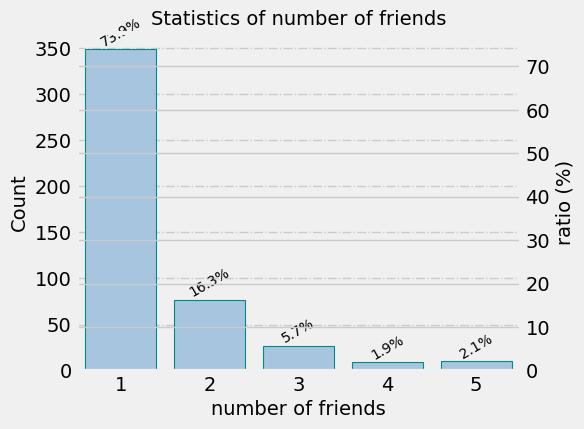

In [7]:
print(social_network.friend_list.map(len).describe())
visual_statistics_discrete(social_network.friend_list.map(len), "number of friends")

### Number of tags

Next, we examine the distribution of **item categories (tags)** assigned to videos. As with the social network data, we observe a **sparse pattern**: most videos have **only one tag**, with a **maximum of `4` tags** and a **mean of around `1.18`**. Each video has at least one tag, which is a good news.

This narrow tagging suggests that videos are typically associated with **focused and specific topics**, rather than being broadly categorized. From a modeling perspective, this can be advantageous:

- **Content-based models** can leverage this structure to build **cleaner item profiles**, reducing noise.
- **Embedding techniques** might perform better with fewer, more distinct category associations.
- The limited overlap in tags may help improve **category-aware recommendation strategies** by maintaining higher tag-specific relevance.

count    10728.000000
mean         1.183166
std          0.436205
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: feat, dtype: float64


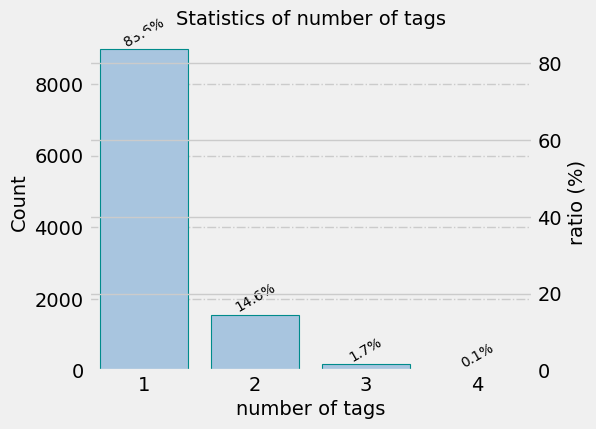

In [8]:
num_feat = item_categories.feat.map(len)
print(num_feat.describe())
visual_statistics_discrete(num_feat, "number of tags")

### Distribution of tags

Now let's see how these tags are distributed !

The chart shows the distribution of **video tags (categories)**, revealing a **strong imbalance**. Tags like **11** and **28** are the most common, each representing over **10%** of the dataset, while many tags appear only a handful of times.

This suggests a **long-tail distribution**, where a few tags dominate and most are rarely used. Such imbalance is typical in user-generated content platforms.

Possible impacts on recommendation models:

- Popular tags may **bias recommendations**, reducing diversity.
- Rare tags may lead to **cold-start issues** in collaborative filtering.
- Potential solutions include **tag reweighting**, **oversampling rare categories**, or using **embedding-based generalization** to better capture relationships between tags.


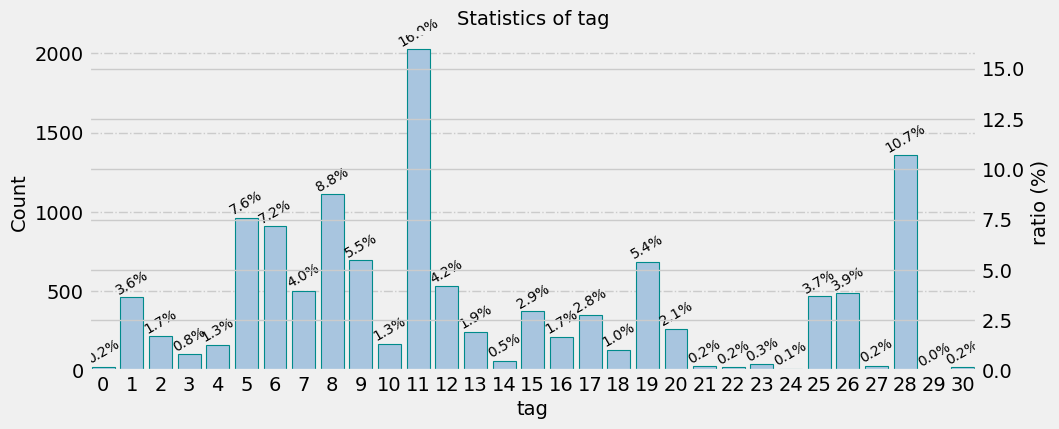

In [9]:
import collections
import itertools

cnt = item_categories.feat.map(collections.Counter)
cnt_all = collections.Counter()
for d in cnt:
    cnt_all.update(d)
# print(dict(cnt_all))
all_feat = pd.Series(sorted(list(itertools.chain.from_iterable([[i]*k for i,k in cnt_all.items()]))),name="feat")
# print(all_feat)
visual_statistics_discrete(all_feat, "tag", size=(12,4.5))

### Distribution of watch ratio

IMPORTANT: As explained in the KuaiRec Paper, "*Then we further select a subset of users and videos from them, aiming to enable as many selected videos as possible to have been watched by the selected users (i.e., high density). For the missing values, i.e., the rest videos that the user did not watch, we manipulate the online recommendation rule to insert these videos into the recommendation streaming to make sure all of them have been shown to these users and received feedback. It takes 15 days for this exposure process.*".

That means that some users were "forced" to watch unseen videos. This will mainly result in having a peak at a **low** watch ratio in `small matrix`.

That is exactly what we can observe at `watch_ratio ≈ 0.1`. This probleme will be **very important** to consider when deciding a threshold for interactions. 

count    4.285013e+06
mean     7.796481e-01
std      4.412498e-01
min      0.000000e+00
25%      4.561677e-01
50%      7.468468e-01
75%      1.065134e+00
max      2.000000e+00
Name: watch_ratio, dtype: float64


/var/folders/0j/8skb_l2j2ms5bcd5v4zdm3fw0000gn/T/ipykernel_69047/2416216360.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df, color='darkcyan', kde=True, fit=norm)


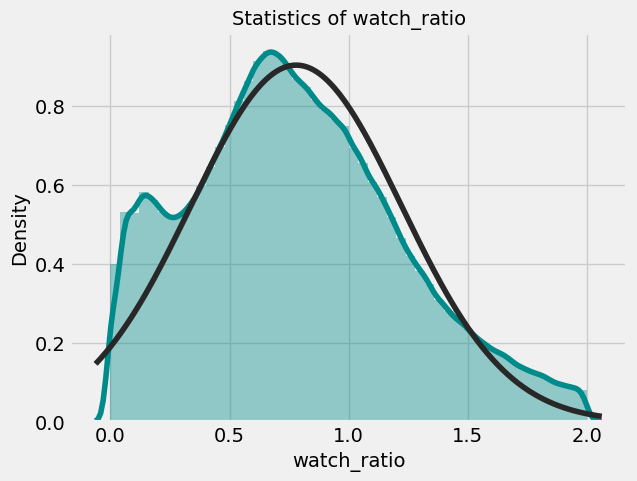

In [ ]:
watch_ratio = small_matrix.watch_ratio[small_matrix.watch_ratio <= 2] #change threshold to zoom in
# watch_ratio = big_matrix.watch_ratio[big_matrix.watch_ratio <= 5]

print(watch_ratio.describe())
visual_continue(watch_ratio)

### Distribution of video duration

count    4.494578e+06
mean     1.422409e+04
std      1.989596e+04
min      3.067000e+03
25%      7.500000e+03
50%      9.560000e+03
75%      1.181900e+04
max      3.150720e+05
Name: video_duration, dtype: float64


/var/folders/0j/8skb_l2j2ms5bcd5v4zdm3fw0000gn/T/ipykernel_69047/2416216360.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df, color='darkcyan', kde=True, fit=norm)


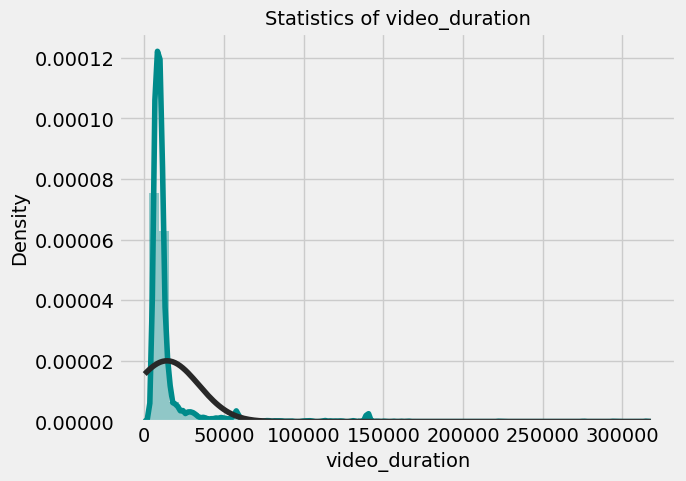

/var/folders/0j/8skb_l2j2ms5bcd5v4zdm3fw0000gn/T/ipykernel_69047/2416216360.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df, color='darkcyan', kde=True, fit=norm)


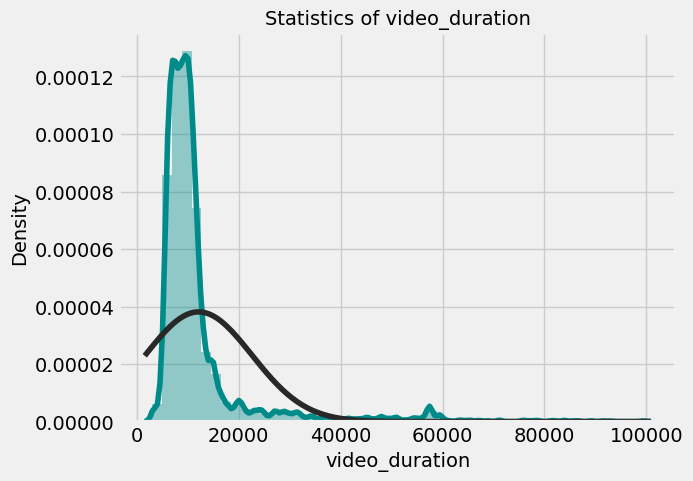

In [28]:
# video_duration = big_matrix.video_duration
video_duration = small_matrix.video_duration

print(video_duration.describe())
visual_continue(video_duration)
visual_continue(video_duration[video_duration < 100000])

### Distribution of each user's total play times

              date
count  1411.000000
mean   3314.365698
std       6.984852
min    3295.000000
25%    3309.000000
50%    3315.000000
75%    3320.000000
max    3327.000000


/var/folders/0j/8skb_l2j2ms5bcd5v4zdm3fw0000gn/T/ipykernel_69047/2416216360.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df, color='darkcyan', kde=True, fit=norm)


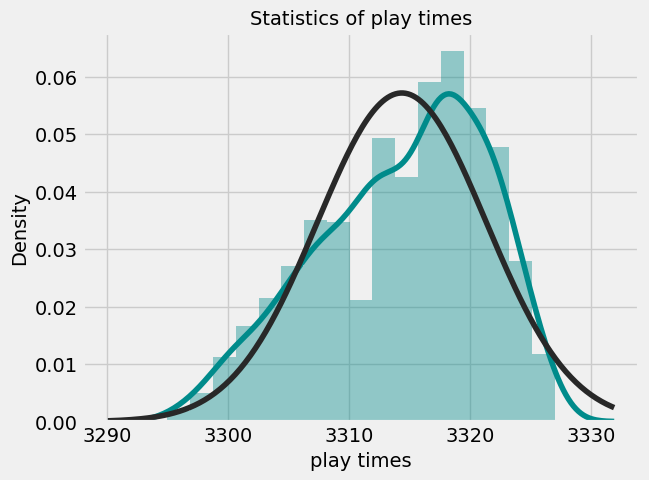

In [17]:
# play_time = big_matrix.groupby('user_id').agg({"date":len})
play_time = small_matrix.groupby('user_id').agg({"date":len})

play_time.name = "play times"
print(play_time.describe())
visual_continue(play_time)

### Distribution of each user's daily play times

count    86671.000000
mean        51.857922
std         32.608372
min          1.000000
25%         28.000000
50%         47.000000
75%         70.000000
max        402.000000
Name: play times, dtype: float64


/var/folders/0j/8skb_l2j2ms5bcd5v4zdm3fw0000gn/T/ipykernel_69047/2416216360.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df, color='darkcyan', kde=True, fit=norm)


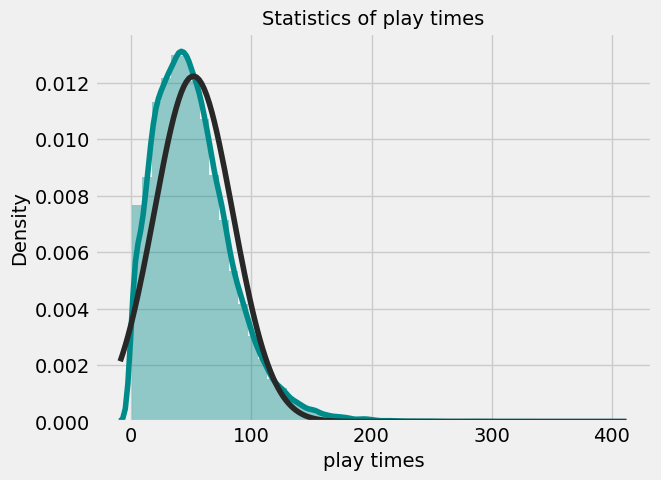

In [18]:
#daily_play_time = big_matrix.groupby(['user_id', 'date']).size()
daily_play_time = small_matrix.groupby(['user_id', 'date']).size()


daily_play_time.name = "play times"
print(daily_play_time.describe())
visual_continue(daily_play_time)

### Effect of Video Length on Average Watch Ratio

Do longer videos get watched proportionally less or more?  
Here we compute, for each video, its mean `watch_ratio`, then scatter it against the video’s duration.

The plot reveals a clear **inverse relationship** between video duration and mean watch ratio.  
**Shorter** videos tend to have **higher average watch ratios**, indicating they are more frequently **rewatched**.  
This suggests that recommendation models might benefit from prioritizing **short videos**, as they are more likely to **engage users**.


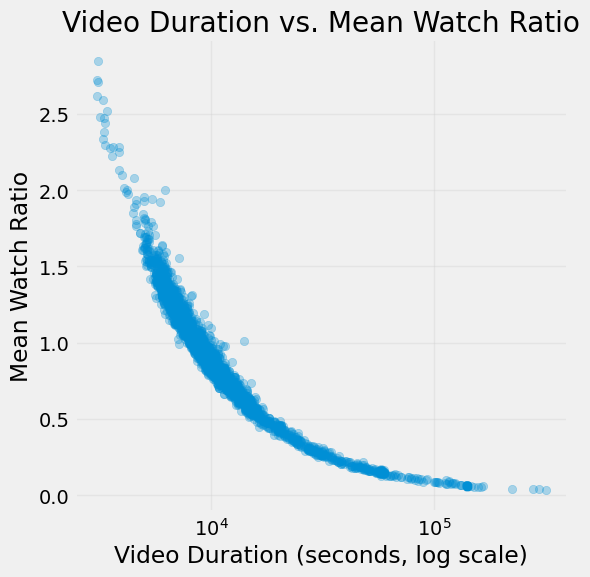

In [33]:
# compute average watch_ratio per video from small_matrix
video_stats = (
    small_matrix
      .groupby('video_id')
      .agg(mean_watch_ratio=('watch_ratio','mean'),
           video_duration=('video_duration','first'))
      .reset_index()
)

plt.figure(figsize=(6,6))
plt.scatter(video_stats['video_duration'], video_stats['mean_watch_ratio'], alpha=0.3)
plt.xscale('log')  # durations vary widely
plt.title("Video Duration vs. Mean Watch Ratio")
plt.xlabel("Video Duration (seconds, log scale)")
plt.ylabel("Mean Watch Ratio")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Watch Ratio Distribution for Top-5 Most Common Tags

We merge `item_categories` with `small_matrix` to see how user engagement (watch_ratio) varies across the most popular video tags.

The boxplots of **watch ratio** for the top-5 **tags** show medians below **1**, with a few extreme **outliers**.  
These outliers may be **artifacts** (e.g., a phone left on **replay**) rather than genuine **rewatches**.  
Tag **28** exhibits the highest **variability**, suggesting stronger **engagement**, while Tag **5** shows the lowest spread.


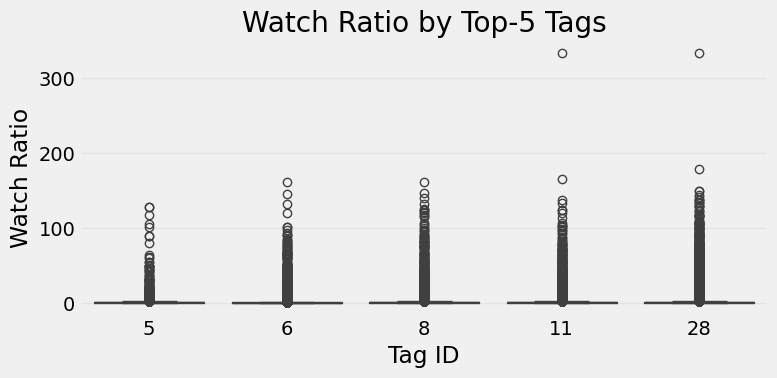

In [ ]:
import itertools

item_expanded = (
    item_categories
      .explode('feat')
      .rename(columns={'feat':'tag_id'})
)

top_tags = (
    item_expanded['tag_id']
      .value_counts()
      .head(5)
      .index
      .tolist()
)

merged = (
    small_matrix
      .merge(item_expanded[item_expanded['tag_id'].isin(top_tags)],
             on='video_id')
)

plt.figure(figsize=(8,4))
sns.boxplot(data=merged, x='tag_id', y='watch_ratio')
plt.title("Watch Ratio by Top-5 Tags")
plt.xlabel("Tag ID")
plt.ylabel("Watch Ratio")
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
